# Mithat Deliverable 2

### Statistical Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = pd.read_csv('AQICensusMerged.csv')

# 1. Basic Descriptive Statistics
ozone_stats = data['OZONE_AQI'].describe()
pm25_stats = data['PM2.5_AQI'].describe()

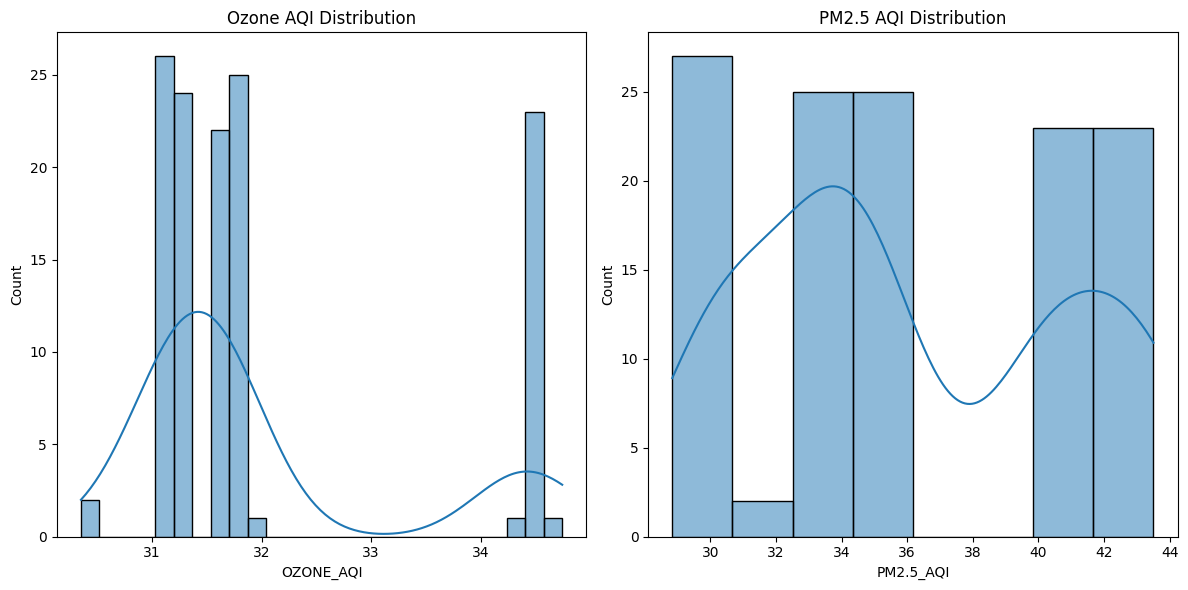

In [5]:
# 2. Distribution of AQI values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['OZONE_AQI'], kde=True)
plt.title('Ozone AQI Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['PM2.5_AQI'], kde=True)
plt.title('PM2.5 AQI Distribution')

plt.tight_layout()
plt.show()

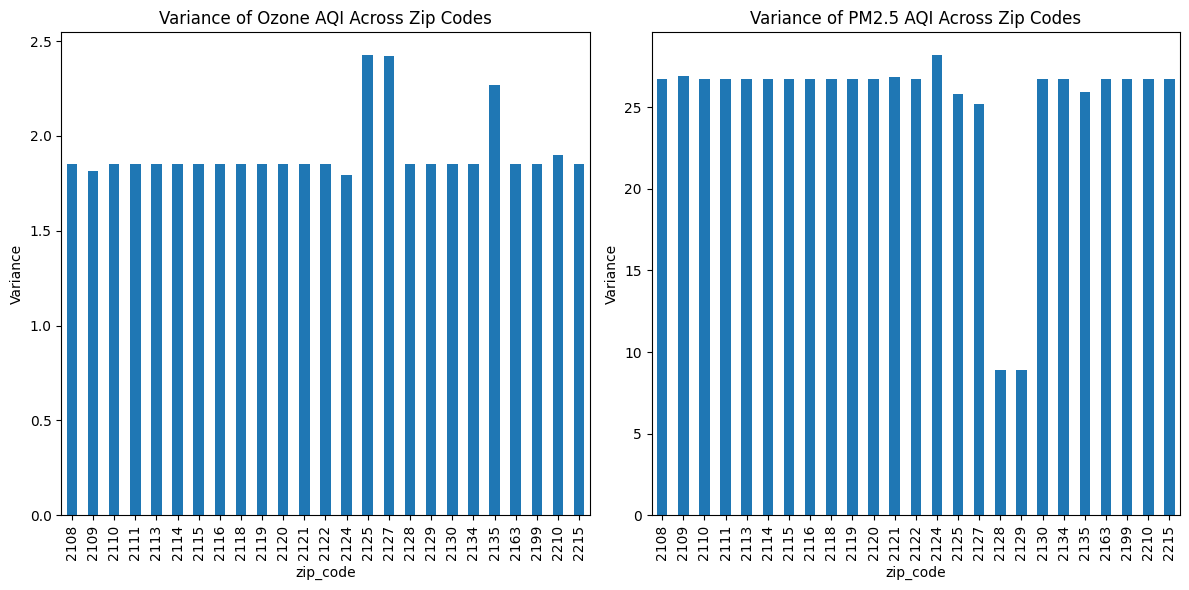

In [6]:
# 3. Variance of AQI values across zip codes
ozone_variance_zip = data.groupby('zip_code')['OZONE_AQI'].var()
pm25_variance_zip = data.groupby('zip_code')['PM2.5_AQI'].var()

# Plotting the variance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ozone_variance_zip.plot(kind='bar')
plt.title('Variance of Ozone AQI Across Zip Codes')
plt.ylabel('Variance')

plt.subplot(1, 2, 2)
pm25_variance_zip.plot(kind='bar')
plt.title('Variance of PM2.5 AQI Across Zip Codes')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

In [7]:
# 4. Checking for overlap in AQI values among different zip codes
# Calculating the number of unique AQI values and their frequency
unique_ozone_aqi = data['OZONE_AQI'].nunique()
unique_pm25_aqi = data['PM2.5_AQI'].nunique()
ozone_aqi_counts = data['OZONE_AQI'].value_counts()
pm25_aqi_counts = data['PM2.5_AQI'].value_counts()

In [8]:
# 5. Correlation between Ozone and PM2.5 AQI
aqi_correlation = data[['OZONE_AQI', 'PM2.5_AQI']].corr()

In [9]:
# Displaying the initial results
ozone_stats_string = ozone_stats.to_string()
pm25_stats_string = pm25_stats.to_string()
aqi_correlation_string = aqi_correlation.to_string()

print('Ozone Stats: \n' + ozone_stats_string)
print('Number of unique ozone AQI values: ' + str(unique_ozone_aqi))

print()

print('PM2.5 Stats: \n' + pm25_stats_string)
print('Number of unique PM2.5 AQI values: ' + str(unique_pm25_aqi))

print()

print('AQI Correlation: \n' + aqi_correlation_string)


#ozone_stats, pm25_stats, unique_ozone_aqi, unique_pm25_aqi, aqi_correlation

Ozone Stats: 
count    125.000000
mean      32.004593
std        1.244306
min       30.349057
25%       31.304469
50%       31.565934
75%       31.729050
max       34.745562
Number of unique ozone AQI values: 13

PM2.5 Stats: 
count    125.000000
mean      36.032334
std        4.695667
min       28.839335
25%       33.369863
50%       34.994521
75%       40.253444
max       43.507163
Number of unique PM2.5 AQI values: 18

AQI Correlation: 
           OZONE_AQI  PM2.5_AQI
OZONE_AQI   1.000000  -0.504781
PM2.5_AQI  -0.504781   1.000000


### AQI relationships

In [10]:
df = pd.read_csv('AQICensusMerged.csv')
df.head()

,Unnamed: 0,zip_code,OZONE_AQI,PM2.5_AQI,year,Total population,Average Household Size,Percentage of Foreign Born Residents,Percentage of Non-English Speakers,Percentage of population aged 5 years and over who speak Spanish at home,...,Median price of owner occupied units (dollars),Median price of rent occupied units (dollars),Median age (years),Percentage of population under 18,Percentage of population over 18,Percentage of white people,Percentage of Black or African American people,Percentage of Asian people,Percentage of Native Hawaiian and Other Pacific Islander people,Percentage of Hispanic or Latino People
0,0,2108,31.729050,40.253444,2017,4225,1.65,15.4,9.9,2.8,...,2000000.0,2368,35.7,5.6,94.4,82.3,5.4,5.2,0.0,7.0
1,1,2108,31.565934,43.079890,2018,4225,1.65,15.4,9.9,2.8,...,2000000.0,2368,35.7,5.6,94.4,82.3,5.4,5.2,0.0,7.0
2,2,2108,31.304469,34.994521,2019,4225,1.65,15.4,9.9,2.8,...,2000000.0,2368,35.7,5.6,94.4,82.3,5.4,5.2,0.0,7.0
3,3,2108,31.083799,33.369863,2021,4225,1.65,15.4,9.9,2.8,...,2000000.0,2368,35.7,5.6,94.4,82.3,5.4,5.2,0.0,7.0
4,4,2108,34.414566,30.378082,2022,4225,1.65,15.4,9.9,2.8,...,2000000.0,2368,35.7,5.6,94.4,82.3,5.4,5.2,0.0,7.0


In [11]:
df = df.drop(['Unnamed: 0'], axis=1)

Linear Regression Mean Squared Error (PM2.5): 8.738874865994744
Linear Regression Mean Squared Error (Ozone): 0.9343845533719282


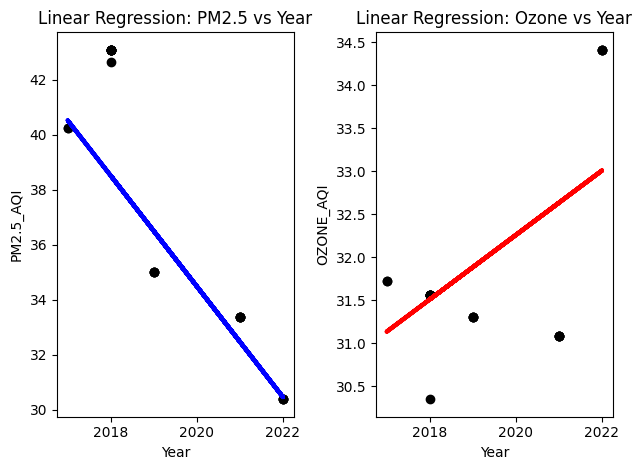

In [12]:
#linear regression model to see the relationship between air quality (in PM2.5) and time (in years) and then regression with ozone

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#with PM2.5_AQI
X_pm25 = df['year'].values.reshape(-1, 1)
y_pm25 = df['PM2.5_AQI'].values.reshape(-1, 1)

X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

linear_reg_model_pm25 = LinearRegression()
linear_reg_model_pm25.fit(X_train_pm25, y_train_pm25)

y_pred_linear_pm25 = linear_reg_model_pm25.predict(X_test_pm25)


mse_linear_pm25 = mean_squared_error(y_test_pm25, y_pred_linear_pm25)
print(f"Linear Regression Mean Squared Error (PM2.5): {mse_linear_pm25}")

plt.subplot(1, 2, 1)
plt.scatter(X_test_pm25, y_test_pm25, color='black')
plt.plot(X_test_pm25, y_pred_linear_pm25, color='blue', linewidth=3)
plt.title('Linear Regression: PM2.5 vs Year')
plt.xlabel('Year')
plt.ylabel('PM2.5_AQI')

# With Ozone_AQI
X_ozone = df['year'].values.reshape(-1, 1)
y_ozone = df['OZONE_AQI'].values.reshape(-1, 1)

X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = train_test_split(X_ozone, y_ozone, test_size=0.2, random_state=42)

linear_reg_model_ozone = LinearRegression()
linear_reg_model_ozone.fit(X_train_ozone, y_train_ozone)

y_pred_linear_ozone = linear_reg_model_ozone.predict(X_test_ozone)

mse_linear_ozone = mean_squared_error(y_test_ozone, y_pred_linear_ozone)
print(f"Linear Regression Mean Squared Error (Ozone): {mse_linear_ozone}")

plt.subplot(1, 2, 2)
plt.scatter(X_test_ozone, y_test_ozone, color='black')
plt.plot(X_test_ozone, y_pred_linear_ozone, color='red', linewidth=3)
plt.title('Linear Regression: Ozone vs Year')
plt.xlabel('Year')
plt.ylabel('OZONE_AQI')

plt.tight_layout()
plt.show()


Linear Regression Mean Squared Error (PM2.5): 8.738874865994744
Linear Regression Mean Squared Error (Ozone): 0.0022333545552992874


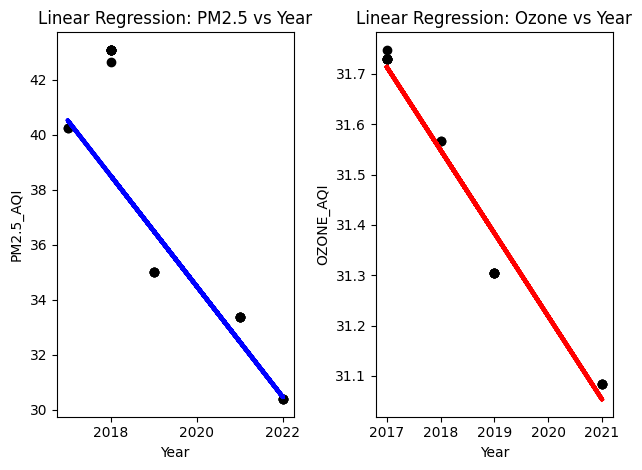

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# removing outliers based on IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

df_filtered_pm25 = remove_outliers(df, 'PM2.5_AQI')

# With PM2.5
X_pm25 = df_filtered_pm25['year'].values.reshape(-1, 1)
y_pm25 = df_filtered_pm25['PM2.5_AQI'].values.reshape(-1, 1)

X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

linear_reg_model_pm25 = LinearRegression()
linear_reg_model_pm25.fit(X_train_pm25, y_train_pm25)

y_pred_linear_pm25 = linear_reg_model_pm25.predict(X_test_pm25)

mse_linear_pm25 = mean_squared_error(y_test_pm25, y_pred_linear_pm25)
print(f"Linear Regression Mean Squared Error (PM2.5): {mse_linear_pm25}")

plt.subplot(1, 2, 1)
plt.scatter(X_test_pm25, y_test_pm25, color='black')
plt.plot(X_test_pm25, y_pred_linear_pm25, color='blue', linewidth=3)
plt.title('Linear Regression: PM2.5 vs Year')
plt.xlabel('Year')
plt.ylabel('PM2.5_AQI')

# Remove outliers for Ozone
df_filtered_ozone = remove_outliers(df, 'OZONE_AQI')

# With Ozone
X_ozone = df_filtered_ozone['year'].values.reshape(-1, 1)
y_ozone = df_filtered_ozone['OZONE_AQI'].values.reshape(-1, 1)

X_train_ozone, X_test_ozone, y_train_ozone, y_test_ozone = train_test_split(X_ozone, y_ozone, test_size=0.2, random_state=42)

linear_reg_model_ozone = LinearRegression()
linear_reg_model_ozone.fit(X_train_ozone, y_train_ozone)

y_pred_linear_ozone = linear_reg_model_ozone.predict(X_test_ozone)

mse_linear_ozone = mean_squared_error(y_test_ozone, y_pred_linear_ozone)
print(f"Linear Regression Mean Squared Error (Ozone): {mse_linear_ozone}")

plt.subplot(1, 2, 2)
plt.scatter(X_test_ozone, y_test_ozone, color='black')
plt.plot(X_test_ozone, y_pred_linear_ozone, color='red', linewidth=3)
plt.title('Linear Regression: Ozone vs Year')
plt.xlabel('Year')
plt.ylabel('OZONE_AQI')

plt.tight_layout()
plt.show()

### AQI Yearly Change Analysis

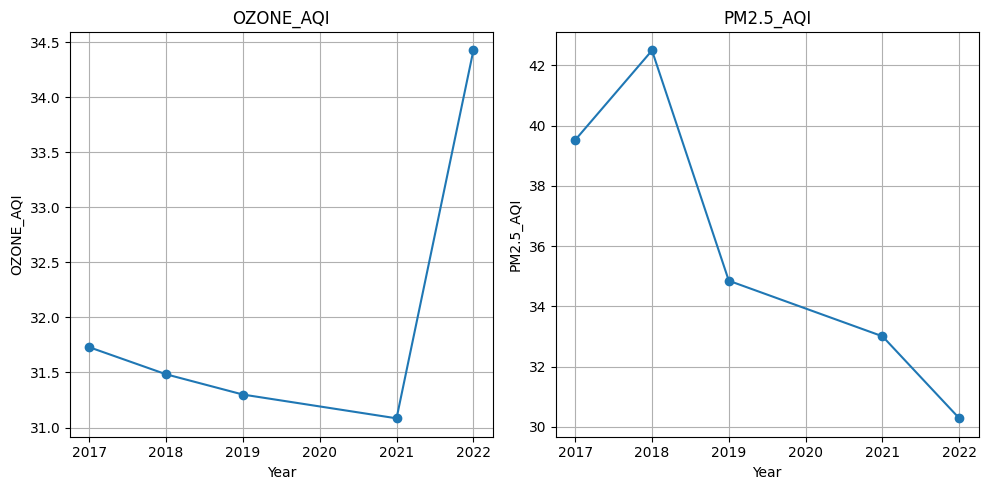

In [14]:
yearly_data = data.groupby('year').mean()

# Selecting key metrics for analysis
aqi_metrics = ['OZONE_AQI', 'PM2.5_AQI']

yearly_data_selected = yearly_data[aqi_metrics]

# 2. Plotting the trends over the years for AQI values and selected census metrics
import matplotlib.pyplot as plt

# Setting up the plot
fig, axes = plt.subplots(1, len(aqi_metrics), figsize=(10, 5))  # Change subplot configuration

# Plotting each metric side by side
for i, metric in enumerate(aqi_metrics):
    axes[i].plot(yearly_data_selected.index, yearly_data_selected[metric], marker='o')
    axes[i].set_title(metric)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


### Boston AQI - Census Analysis

In [15]:
#bosdf = pd.read_csv('BostonCensus.csv')
bosdf = pd.read_csv('BostonCensusAQIMerged.csv')

In [16]:
bosdf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'year',
       'Estimate of Total Population by Place of Birth',
       'Estimate of Average Household Size by Household Type',
       'Estimate of Foreign-Born Population by Place of Birth',
       'Estimate of Population 5 Years and Over Speaking a Language other than English at Home',
       'Estimate of Population 5 Years and Over Speaking Spanish at Home',
       'Estimate of Population 5 Years and Over Speaking Other Indo-European Languages at Home',
       'Estimate of Population 5 Years and Over Speaking Asian and Pacific Islander Languages at Home',
       'Estimate of Population 5 Years and Over Speaking Other Languages at Home',
       'Percentage of Population 25 Years and Over with Bachelor's Degrees by Educational Attainment',
       'Percentage of Total Population with American Ancestry',
       'Percentage of Total Population with Arab Ancestry',
       'Percentage of Total Population with Dutch Ancestry',
       'Percentage of Total

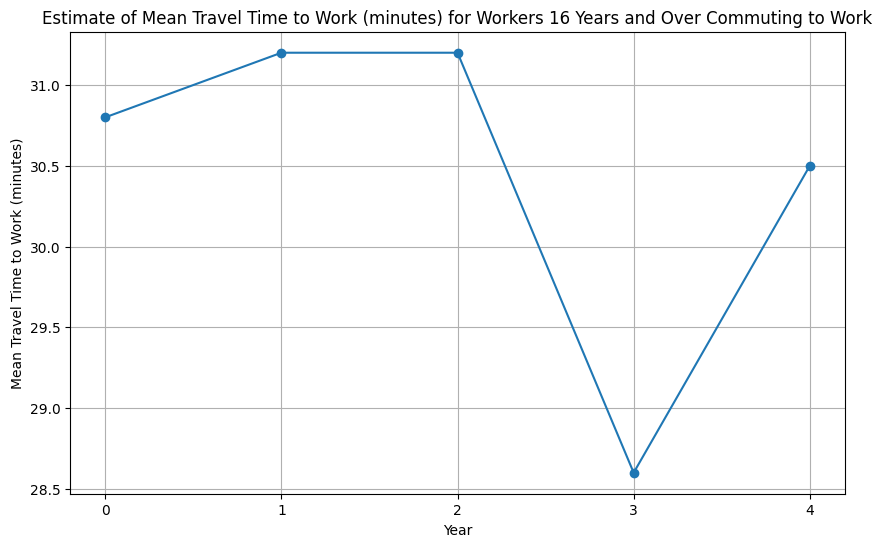

In [17]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
column_to_plot = 'Estimate of Mean Travel Time to Work (minutes) for Workers 16 Years and Over Commuting to Work'

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bosdf['Unnamed: 0'], bosdf[column_to_plot], marker='o', linestyle='-')
plt.title(column_to_plot)
plt.xlabel('Year')
plt.ylabel('Mean Travel Time to Work (minutes)')
plt.grid(True)

# Set x-ticks to be the years from the 'Unnamed: 0' column
plt.xticks(ticks=bosdf['Unnamed: 0'], labels=bosdf['Unnamed: 0'])

plt.show()



### How census relates to changes in AQI over the years

In [18]:
census_data_relevant = bosdf[["Unnamed: 0", "Estimate of the Total Population 18 Years and Over", "OZONE_AQI", "PM2.5_AQI"]].copy()
census_data_relevant.rename(columns={"Unnamed: 0": "year"}, inplace=True)

# Converting the percentage data to a numeric format
census_data_relevant["Estimate of the Total Population 18 Years and Over"] = census_data_relevant["Estimate of the Total Population 18 Years and Over"].str.replace(',', '').astype(float)

correlation_results = census_data_relevant.corr()

correlation_results[['OZONE_AQI', 'PM2.5_AQI']]

,OZONE_AQI,PM2.5_AQI
year,0.574340,-0.895390
Estimate of the Total Population 18 Years and Over,-0.574009,0.768753
OZONE_AQI,1.000000,-0.538757
PM2.5_AQI,-0.538757,1.000000


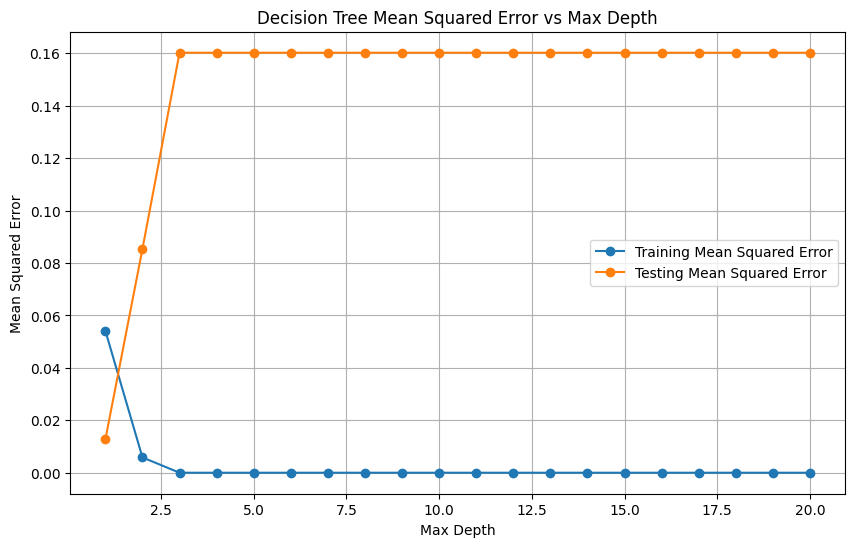

In [19]:
#decision tree with census yearly specific data instead of 5 year estimate 
#decision regression tree with race features 
#calculating the right depth for the tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

numeric_columns = ['Estimate of Total Population by Place of Birth', 'Estimate of Foreign-Born Population by Place of Birth', 
                   'Estimate of Population 5 Years and Over Speaking a Language other than English at Home', 
                   'Estimate of the Total Population with One Race: White', 
                   'Estimate of the Total Population with One Race: Black or African American', 
                   'Estimate of the Total Population with One Race: Asian', 
                   'Estimate of the Total Population with One Race: Native Hawaiian and Other Pacific Islander', 
                   'Estimate of the Total Population Hispanic or Latino (of any race)']

bosdf[numeric_columns] = bosdf[numeric_columns].replace({',': ''}, regex=True).astype(float)

features = ['Estimate of Foreign-Born Population by Place of Birth', 
            'Estimate of Population 5 Years and Over Speaking a Language other than English at Home', 
            'Estimate of the Total Population with One Race: White', 
            'Estimate of the Total Population with One Race: Black or African American', 
            'Estimate of the Total Population with One Race: Asian', 
            'Estimate of the Total Population with One Race: Native Hawaiian and Other Pacific Islander', 
            'Estimate of the Total Population Hispanic or Latino (of any race)']

target = 'OZONE_AQI'

bosdf = bosdf.dropna(subset=features + [target])
X = bosdf[features]
y = bosdf[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_mse = []
test_mse = []


max_depth_values = list(range(1, 21))

for depth in max_depth_values:
    dt_regressor = DecisionTreeRegressor(max_depth=depth, random_state=42)
    
   
    dt_regressor.fit(X_train, y_train)
    train_predictions = dt_regressor.predict(X_train)
    train_mse.append(mean_squared_error(y_train, train_predictions))
  
    test_predictions = dt_regressor.predict(X_test)
    test_mse.append(mean_squared_error(y_test, test_predictions))


plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_mse, label='Training Mean Squared Error', marker='o')
plt.plot(max_depth_values, test_mse, label='Testing Mean Squared Error', marker='o')
plt.title('Decision Tree Mean Squared Error vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

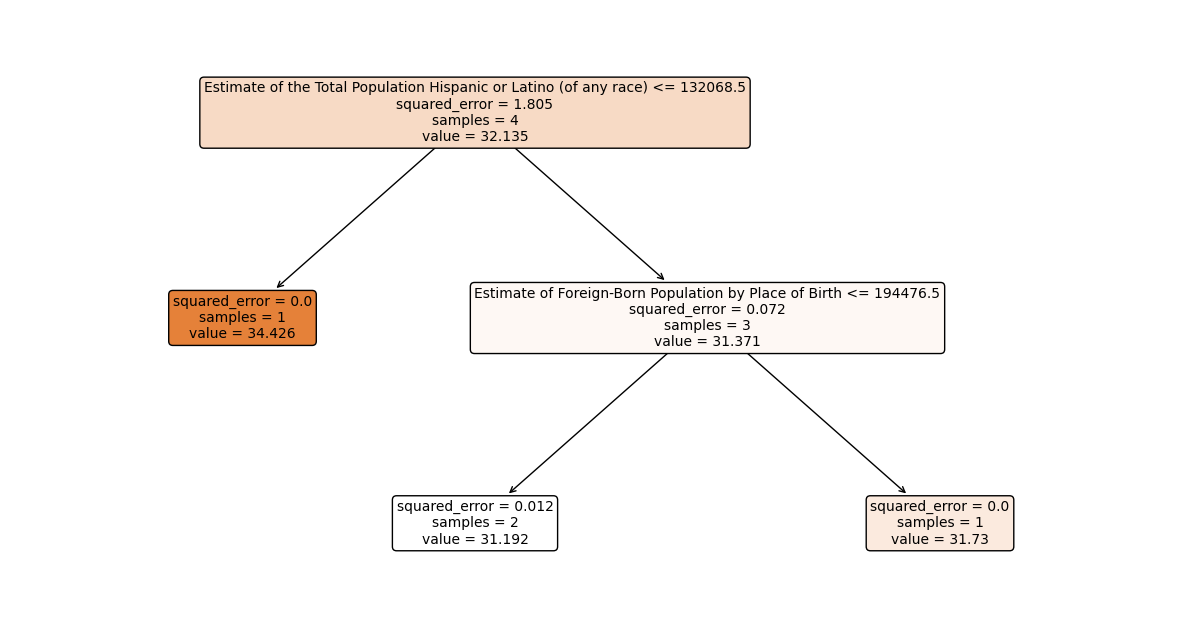

Testing Mean Squared Error (max_depth=2): 0.08537090548900082


In [20]:
# Creating decision tree with best depth 
dt_regressor = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_regressor.fit(X_train, y_train)

test_predictions = dt_regressor.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)

from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
plot_tree(dt_regressor, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.show()
print(f'Testing Mean Squared Error (max_depth=2): {test_mse}')

### AQI - Disease Data Analysis

In [21]:
data = pd.read_csv('filtered_health_data.csv')

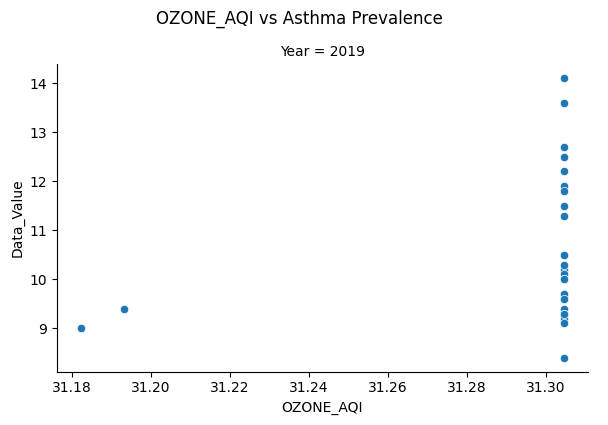

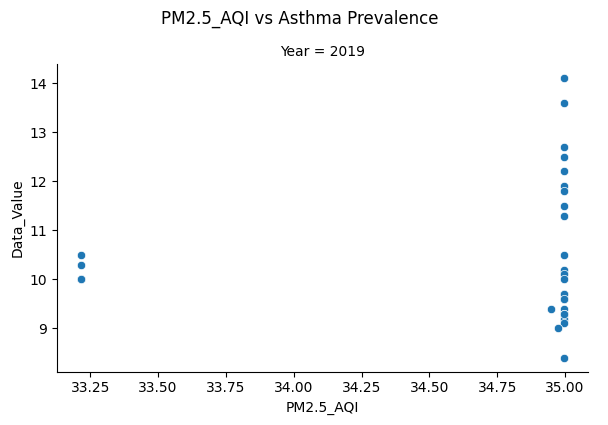

In [22]:
import matplotlib.pyplot as plt

asthma_data = data[data['Measure'] == "Current asthma among adults aged >=18 years"]

# Creating faceted grid plots for asthma
# FacetGrid for OZONE_AQI
g_ozone_asthma = sns.FacetGrid(asthma_data, col='Year', height=4, aspect=1.5)
g_ozone_asthma.map(sns.scatterplot, 'OZONE_AQI', 'Data_Value')
g_ozone_asthma.add_legend()
g_ozone_asthma.fig.suptitle('OZONE_AQI vs Asthma Prevalence', y=1.05)

# FacetGrid for PM2.5_AQI
g_pm25_asthma = sns.FacetGrid(asthma_data, col='Year', height=4, aspect=1.5)
g_pm25_asthma.map(sns.scatterplot, 'PM2.5_AQI', 'Data_Value')
g_pm25_asthma.add_legend()
g_pm25_asthma.fig.suptitle('PM2.5_AQI vs Asthma Prevalence', y=1.05)

plt.show()

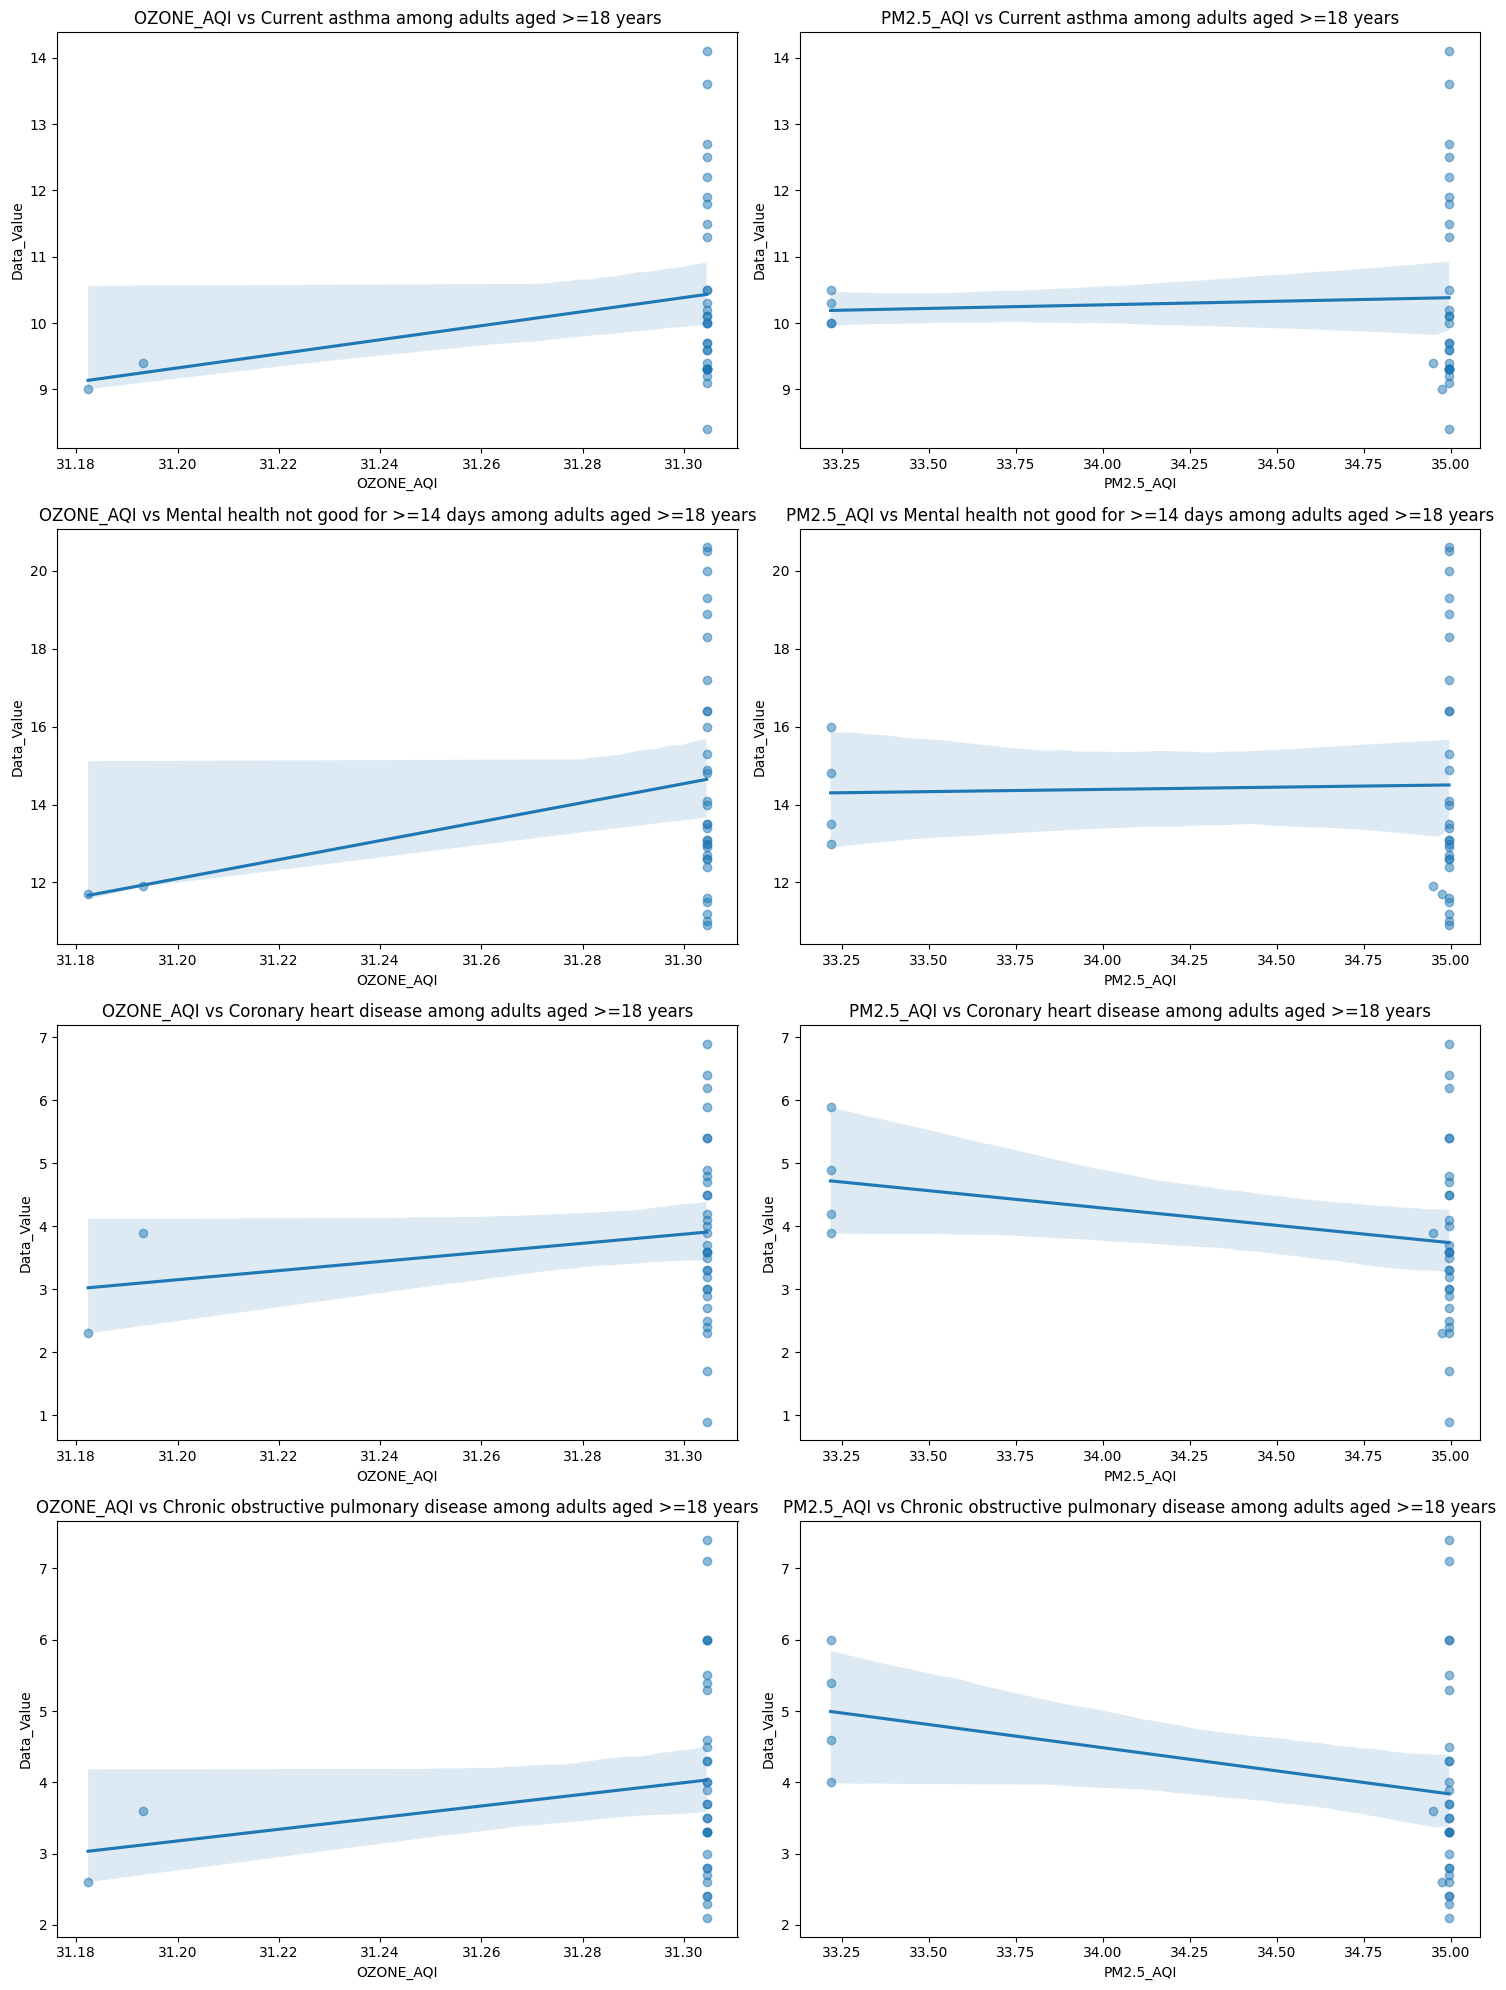

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Selected health measures for which the regression plots are requested
selected_measures_for_output = [
    "Current asthma among adults aged >=18 years",
    "Mental health not good for >=14 days among adults aged >=18 years",
    "Coronary heart disease among adults aged >=18 years",
    "Chronic obstructive pulmonary disease among adults aged >=18 years"
]

# Create the regression plots for the selected measures
fig, axes = plt.subplots(len(selected_measures_for_output), 2, figsize=(15, 5 * len(selected_measures_for_output)))

for i, measure in enumerate(selected_measures_for_output):
    # Filter the dataset for each specific disease
    filtered_data = data[data['Measure'] == measure]

    # Regression plot for OZONE_AQI vs Data_Value
    sns.regplot(ax=axes[i, 0], x='OZONE_AQI', y='Data_Value', data=filtered_data, scatter_kws={'alpha':0.5}).set_title(f'OZONE_AQI vs {measure}')

    # Regression plot for PM2.5_AQI vs Data_Value
    sns.regplot(ax=axes[i, 1], x='PM2.5_AQI', y='Data_Value', data=filtered_data, scatter_kws={'alpha':0.5}).set_title(f'PM2.5_AQI vs {measure}')

plt.tight_layout()
plt.show()